In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import xarray as xr

import neuro_op as nop

In [13]:
nop.plot_setup()
cmap = "inferno"

# Purpose

Analyse behaviour of a single node in neuro_op's framework.

Scanned dimensions:
- $\mu\in [0.0,1.0,...,5.0]$
- $\sigma\in [0.5,1,5,10]$

In [14]:
def get_name(mu, sd, sdw):
    return str(
        "../testing/@n1_amor/BlackJack2/output/"
        # "../testing/@n1_amor/WallStreet2/output/"
        + "out"
        + "-sdw"
        + str(sdw)
        + "-mu"
        + str(mu)
        + "-sd"
        + str(sd)
        + ".h5"
    )


def get_kld(mu, sd, sdw):
    data = nop.import_hdf5(get_name(mu, sd, sdw))
    return data["kl_divs"][:, 0]


def get_mu(mu, sd, sdw):
    data = nop.import_hdf5(get_name(mu, sd, sdw))
    return data["mu_nodes"][:, 0]

In [15]:
foo = nop.import_hdf5(get_name(0.4, 0.4, 0.4))
foo["kl_divs"].shape

(100002, 1)

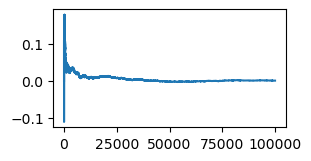

In [16]:
dat = nop.import_hdf5(get_name(0.0, 0.2, 0.0))
plt.plot(dat["mu_nodes"])
dat["nodesConjMu"][0]

In [17]:
# Create xarray dataset with the following dimensions:
# mu, sd, sdw, time
mu0_arr = np.round(np.arange(0, 2.1, 0.2), 1)
sd_arr = np.round(np.arange(0.2, 2.1, 0.2), 1)
sdw_arr = np.round(np.arange(0.2, 1.1, 0.2), 1)
t_arr = np.arange(0, 100002, 1)
mu_arr = np.zeros((len(mu0_arr), len(sd_arr), len(sdw_arr), len(t_arr)))
kld_arr = np.zeros((len(mu0_arr), len(sd_arr), len(sdw_arr), len(t_arr)))

for i, mu in enumerate(mu0_arr):
    for j, sd in enumerate(sd_arr):
        for k, sdw in enumerate(sdw_arr):
            mu_arr[i, j, k] = get_mu(mu, sd, sdw)
            kld_arr[i, j, k] = get_kld(mu, sd, sdw)

da_mu = xr.DataArray(
    mu_arr,
    dims=["mu", "sd", "sdw", "time"],
    coords={"mu": mu0_arr, "sd": sd_arr, "sdw": sdw_arr, "time": t_arr},
)
da_kld = xr.DataArray(
    kld_arr,
    dims=["mu", "sd", "sdw", "time"],
    coords={"mu": mu0_arr, "sd": sd_arr, "sdw": sdw_arr, "time": t_arr},
)

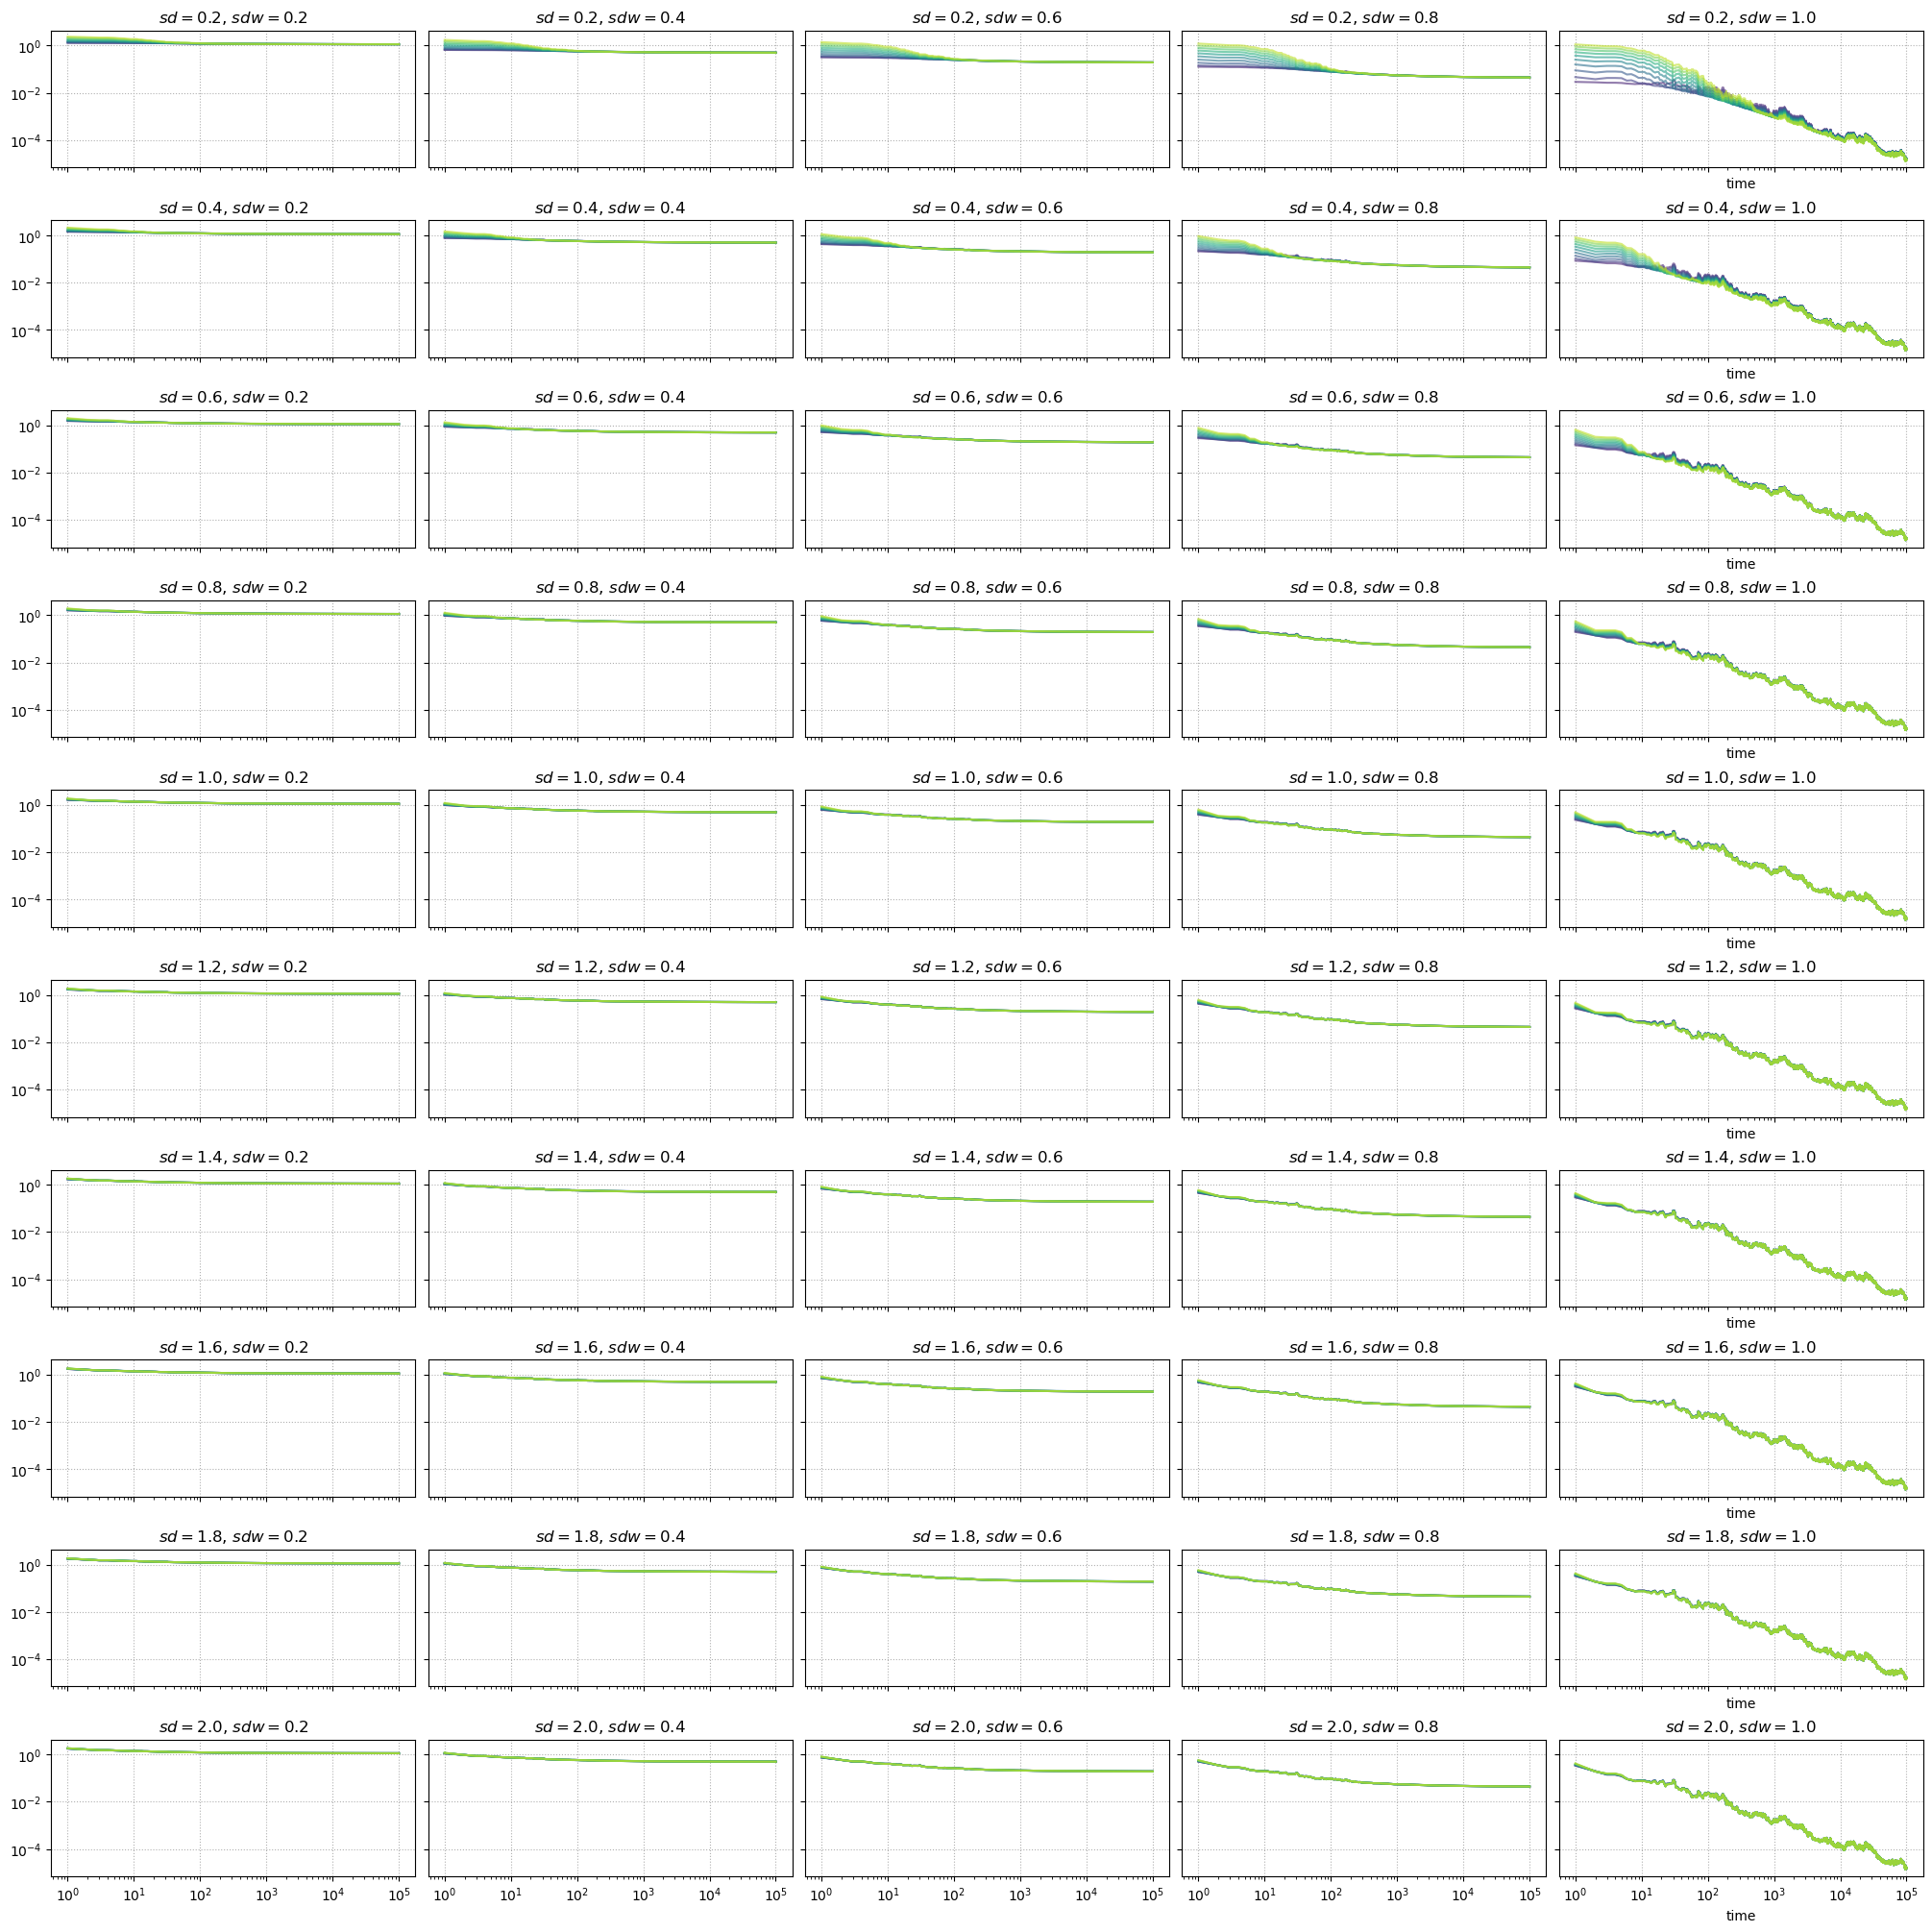

In [18]:
da = da_kld
t0 = 1
t1 = 100001
fig, ax = plt.subplots(
    len(sd_arr), len(sdw_arr), figsize=(20, 20), sharex=True, sharey=True
)
for j, sd in enumerate(sd_arr):
    for k, sdw in enumerate(sdw_arr):
        ax[j, k].set_prop_cycle(color=nop.get_colorcycle(len(sd_arr)))
        for i, mu in enumerate(sd_arr):
            ax[j, k].plot(
                da.coords["time"][t0:t1],
                da[i, j, k, t0:t1],
                label="$\sigma=$" + str(sd),
                alpha=0.6,
            )
            ax[j, k].loglog()
            ax[j, k].grid(linestyle=":")
        if i == 0:
            ax[j, k].set_ylabel("KL divergence")
        # if i == len(mu0_arr) - 1:
        #    ax[j,k].legend(loc="upper left", bbox_to_anchor=(1.1, 1), borderaxespad=0.0)
        if k == len(sdw_arr) - 1:
            ax[j, k].set_xlabel("time")
        ax[j, k].set_title("$sd=$" + str(sd) + ", $sdw=$" + str(sdw))
        # ax[j,k].set_aspect("equal")

# fig.savefig("fig/TMP-ClosedCasino.pdf")

In [22]:
# Now do the same for "WallStreet" run


def get_name(mu, sd, sdw):
    return str(
        "../testing/@n1_amor/WallStreet2/output/"
        + "out"
        + "-sdw"
        + str(sdw)
        + "-mu"
        + str(mu)
        + "-sd"
        + str(sd)
        + ".h5"
    )


def get_kld(mu, sd, sdw):
    data = nop.import_hdf5(get_name(mu, sd, sdw))
    return data["kl_divs"][:, 0]


def get_mu(mu, sd, sdw):
    data = nop.import_hdf5(get_name(mu, sd, sdw))
    return data["mu_nodes"][:, 0]

In [25]:
# Create xarray dataset with the following dimensions:
# mu, sd, sdw, time

mu0_arr = np.round(np.arange(0, 11, 1), 0)
sd_arr = np.round(np.arange(0.2, 2.2, 0.2), 1)
sdw_arr = np.round(np.arange(0.2, 1.1, 0.2), 1)
t_arr = np.arange(0, 100002, 1)
mu_arr = np.zeros((len(mu0_arr), len(sd_arr), len(sdw_arr), len(t_arr)))
kld_arr = np.zeros((len(mu0_arr), len(sd_arr), len(sdw_arr), len(t_arr)))

for i, mu in enumerate(mu0_arr):
    for j, sd in enumerate(sd_arr):
        for k, sdw in enumerate(sdw_arr):
            mu_arr[i, j, k] = get_mu(mu, sd, sdw)
            kld_arr[i, j, k] = get_kld(mu, sd, sdw)

da_mu = xr.DataArray(
    mu_arr,
    dims=["mu", "sd", "sdw", "time"],
    coords={"mu": mu0_arr, "sd": sd_arr, "sdw": sdw_arr, "time": t_arr},
)
da_kld = xr.DataArray(
    kld_arr,
    dims=["mu", "sd", "sdw", "time"],
    coords={"mu": mu0_arr, "sd": sd_arr, "sdw": sdw_arr, "time": t_arr},
)

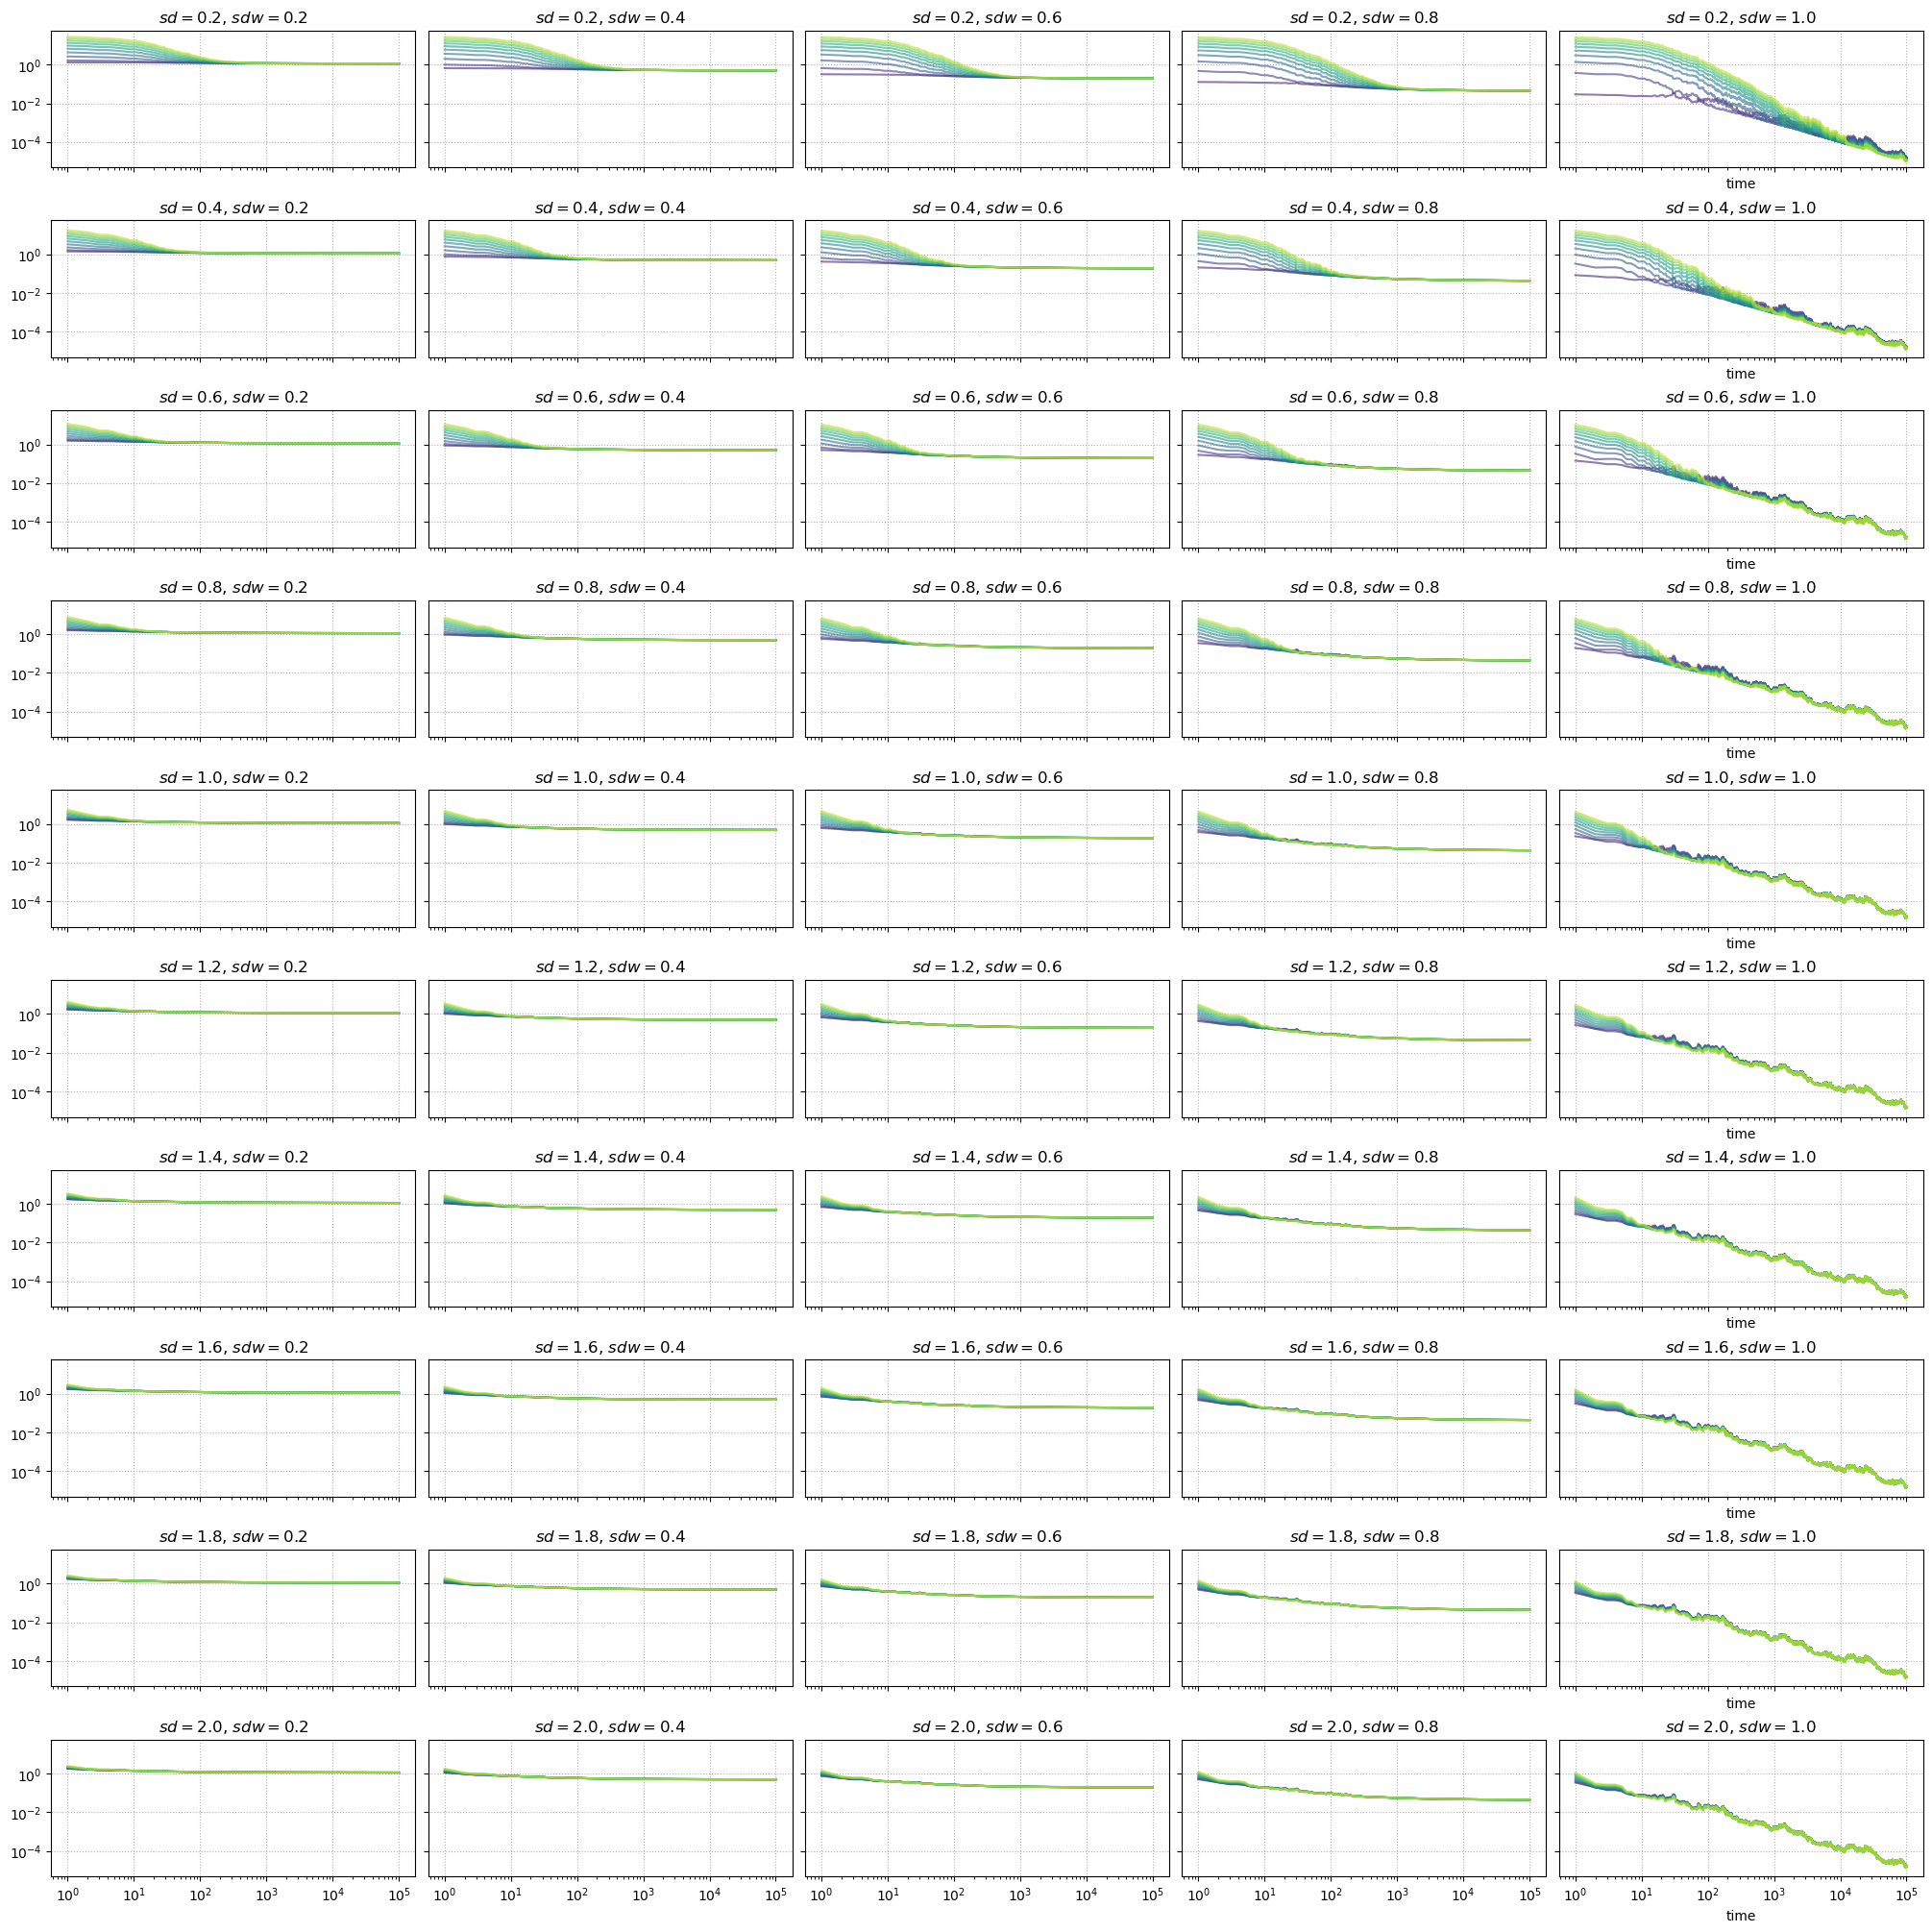

In [26]:
da = da_kld
t0 = 1
t1 = 100001
fig, ax = plt.subplots(
    len(sd_arr), len(sdw_arr), figsize=(20, 20), sharex=True, sharey=True
)
for j, sd in enumerate(sd_arr):
    for k, sdw in enumerate(sdw_arr):
        ax[j, k].set_prop_cycle(color=nop.get_colorcycle(len(sd_arr)))
        for i, mu in enumerate(sd_arr):
            ax[j, k].plot(
                da.coords["time"][t0:t1],
                da[i, j, k, t0:t1],
                label="$\sigma=$" + str(sd),
                alpha=0.6,
            )
            ax[j, k].loglog()
            ax[j, k].grid(linestyle=":")
        if i == 0:
            ax[j, k].set_ylabel("KL divergence")
        # if i == len(mu0_arr) - 1:
        #    ax[j,k].legend(loc="upper left", bbox_to_anchor=(1.1, 1), borderaxespad=0.0)
        if k == len(sdw_arr) - 1:
            ax[j, k].set_xlabel("time")
        ax[j, k].set_title("$sd=$" + str(sd) + ", $sdw=$" + str(sdw))
        # ax[j,k].set_aspect("equal")

# fig.savefig("fig/TMP-ClosedCasino.pdf")